In [1]:

# import module list is independent on respective file.
import yfinance as yf
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt



from datetime import datetime as dt
from datetime import date as date
from datetime import timedelta
from dateutil.relativedelta import relativedelta


from scipy.stats import mstats
import japanize_matplotlib



In [2]:

def folding_price_data(df, index2):
       


    DATA = pd.DataFrame({})


    for i in range(0,len(df), index2):

        try:
            temp = df.iloc[i:index2+i,:]
        except:
            temp = df.iloc[i:,:]
        M, m = max(temp["High"]), min(temp["Low"])
        open_p, close_p = temp['Open'].values[0], temp['Close'].values[-1]
        tp = pd.DataFrame({'Open':[open_p], 'High':[M], 'Low':[m], 'Close':[close_p]}, index=[temp.index.to_list()[0]])
        DATA = pd.concat([DATA, tp], axis=0)
        

    #DATA.index = df.query('@df.index.month % @index2== 0').index

    return DATA 


        

In [3]:
# 月時価格データおよび予測

predict = pd.read_csv("./prediction/" + 'US' + f"3mo1218Test2.csv", index_col=0, parse_dates=True)
predict

,predict
2009-01-01,0.0
2009-07-01,1.0
2010-01-01,0.0
2010-07-01,0.0
2011-01-01,0.0
2011-07-01,1.0
2012-01-01,0.0
2012-07-01,1.0
2013-01-01,1.0
2013-07-01,1.0


In [4]:
ticker = 'IYR'
price = yf.download(ticker, start='2011-09-01', end='2023-09-30', interval='1mo')

price

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2011-09-01,57.060001,57.380001,50.430000,50.570000,32.916214,231594400
2011-10-01,50.180000,58.180000,46.700001,57.240002,37.659756,243037900
2011-11-01,55.720001,57.529999,51.230000,55.139999,36.278107,172846900
2011-12-01,54.990002,57.660000,53.509998,56.810001,37.376846,116678700
2012-01-01,57.740002,61.020000,56.060001,60.560001,40.261250,116124600
...,...,...,...,...,...,...
2023-05-01,85.360001,85.889999,79.940002,82.230003,80.245605,124955000
2023-06-01,82.089996,87.040001,81.360001,86.540001,84.451599,129892000
2023-07-01,86.440002,90.339996,85.269997,88.050003,86.330795,125916200


In [5]:

data2 = yf.download(ticker, start='2011-01-01', end='2023-06-30', interval='1d')
switch = 0
pd.set_option('display.max_rows', 10)


def get_nth_week(day):
    return (day - 1) // 7 + 1

def get_nth_dow(year, month, day):
    return get_nth_week(day), calendar.weekday(year, month, day)


def get_nth_dow_datetime(year, month, day):
    return get_nth_week(day), date(year, month, day).weekday()

def get_date_of_nth_dow(year, month, nth, dow):
    day = get_day_of_nth_dow(year, month, nth, dow)
    return dt.date(year, month, day) if day else None

# 12日(休日の場合は直後の平日)に決済、決済後の平日に新規購入        
count = 0
data3 = data2
for i, j in data3.iterrows():
    

    if i.month % 6 != 1:
        data3.loc[i, 'Trade'] =  0
        continue

    
    if switch == 1:
        switch += 1
        data3.loc[i, 'Trade'] =  2
        continue
    
    row, week_num = get_nth_dow_datetime(*[i.year, i.month, i.day])

    
    
    
    if (switch == 0) & (i.day>= 12):
        data3.loc[i, 'Trade'] =  1
        count = 0
        switch += 1

    elif i.day in range(1, 10):
        data3.loc[i, 'Trade'] =  0
        
        switch = 0
    
    else:
    
        data3.loc[i, 'Trade'] =  0
        pass
    
    
        
    
data2 = data3.fillna({"Trade": float(0)})
data2['year'], data2['month'] = data2.index.year, data2.index.month
data2.head(100)

[*********************100%%**********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume,Trade,year,month
Date,,,,,,,,,
2011-01-03,56.290001,56.930000,56.250000,56.830002,36.340218,8221200,0.0,2011,1
2011-01-04,57.000000,57.080002,55.560001,55.820000,35.694359,11275100,0.0,2011,1
2011-01-05,55.639999,56.169998,55.599998,56.049999,35.841434,9167100,0.0,2011,1
2011-01-06,56.139999,56.230000,55.619999,55.750000,35.649593,6797500,0.0,2011,1
2011-01-07,55.900002,56.099998,55.230000,55.730000,35.636810,10495700,0.0,2011,1
...,...,...,...,...,...,...,...,...,...
2011-05-19,61.619999,61.980000,61.250000,61.660000,39.772324,5112300,0.0,2011,5
2011-05-20,61.450001,61.660000,60.980000,61.029999,39.365959,5737100,0.0,2011,5
2011-05-23,60.389999,60.689999,60.290001,60.389999,38.953144,10880900,0.0,2011,5


In [6]:
fold_index = 6

price_and_predict = pd.concat([folding_price_data(price.loc["2012-01-01":"2023-08-01"], fold_index), predict.loc[:"2023-09-01",:]],axis=1)
price_and_predict

,Open,High,Low,Close,predict
2009-01-01,NaN,NaN,NaN,NaN,0.0
2009-07-01,NaN,NaN,NaN,NaN,1.0
2010-01-01,NaN,NaN,NaN,NaN,0.0
2010-07-01,NaN,NaN,NaN,NaN,0.0
2011-01-01,NaN,NaN,NaN,NaN,0.0
...,...,...,...,...,...
2021-07-01,102.000000,116.889999,101.559998,116.139999,1.0
2022-01-01,116.500000,116.750000,86.570000,91.980003,1.0
2022-07-01,91.790001,103.360001,75.660004,84.190002,1.0
2023-01-01,84.959999,96.019997,78.110001,86.540001,0.0


In [7]:
# graphization
def graph(df, save, file_name, simple_interest=False):
    if not simple_interest:
        
        print("利回り中心です。各y値は、総資産/初期資金です。")
        temp = df["interest"].values

        initial = df["Asset"][0] 
        lis = np.cumsum(temp) + initial

        profit_month =np.array(lis)  / initial
        
        # 月ごとのそれまでの最大資産の計算
        max_assets = pd.Series(profit_month).cummax().values
        
        total = profit_month
        
        # ドローダウンの計算
        dd = 1 - profit_month / max_assets
    else:
        print("単利計算です。各y値は、その時点までの各利率の累積です。")
        temp = df["Return"].values

        
        
        profit_month = np.array(temp)

        # 単利運用での資産額の計算
        total = 1 + np.cumsum(profit_month)

        # 月ごとのそれまでの最大資産の計算
        max_assets = pd.Series(total).cummax().values

        # ドローダウンの計算
        dd = max_assets - total
    
    # 最大ドローダウンの計算
    max_dd_percent = max(dd) * 100
    print(f'最大ドローダウン: {max_dd_percent:.3f} %')

    fig, ax1 = plt.subplots(figsize=(12, 7))
    ax2 = ax1.twinx()
    
    ax1.set_ylabel('資産額')
    ax1.plot(total, label='Total')
    ax1.plot(max_assets, label='max Total')
    ax1.legend()

    ax2.set_ylabel('Drawdown(％)')
    ax2.bar(np.arange(len(dd)), dd*100, alpha=0.5, color='pink', label='ドローダウン(％)')
    ax2.legend(loc='upper right')
    if save:
        fig.savefig(file_name+".png")

In [16]:


# 計算用

# ロスカットした際に所持金額が足りないとき
def Asset_initiated(initiate_asset, open_price, rate, next_month_open_price,totalreturn, ind):    

    # Losscut : open_price * (1-losscut_rate) > next_month_open_price
    string = str(ind) + " "
    
    if open_price * (1+ rate) > next_month_open_price:
        pass
    elif open_price * (1+ rate)+totalreturn > next_month_open_price:
        # if you trade off at all,sale price at the time + totalreturn > next month open price,then you can trade it freely.   
        pass
    else:
        # initiate asset is replaced.
        initiate_asset = next_month_open_price
        
        # string : ProfitLine -> "profit line is crossed."" Losscut -> "Losscut.""
        print(string + " And initiate asset is replaced.")
    
    return initiate_asset


# plはprofit and loss です.

def order_pl(data, losscut, profitline, losscut2, profitline2, predict):
    open_price = data.query('Trade==2')['Open'].values[0]
    open_price = float(open_price)
    skip_num = np.where(data['Trade'].values==2)[0][0]
    
    switch = 0
    # ↓not used
    return_value = 0
    data = data.iloc[skip_num:, :]
    try:
        exit_idxs = np.where(data['Trade'].values==1)[1]
    except:
        exit_idxs = np.where(data['Trade'].values==1)[0]
        
    if len(exit_idxs) > 0:
        # データに手仕舞い日以降のデータが含まれていたら削除
        data = data.iloc[:exit_idxs[-1]+1]
    string = "None"
    for i, temp in data.iterrows():

        high_to_open = temp["High"] - open_price
        open_to_low = open_price - temp["Low"]
        if predict == 0: 
            
            # sell order 

            perspective_maxloss = high_to_open 
            perspective_maxprofit = open_to_low
            
            losscut_rate = losscut2
            profit_rate = profitline2
            
            director = -1    
        else:           
            
            # buy order
            
            perspective_maxloss = open_to_low
            perspective_maxprofit = high_to_open
            director = 1
            
            losscut_rate = losscut
            profit_rate = profitline
            pass
        
        
        
        profit_secure = perspective_maxprofit >= open_price * profit_rate
        loss_cut = perspective_maxloss >= open_price * losscut_rate
        if (not profit_secure) and (not loss_cut):
            # 利確・損切に到達していないとき
            continue
        elif profit_secure and loss_cut:
            
            # まさかないとは思うが、、、日中でロスカットと利確ラインに到達したとき
            assert False, "TODO: 日中でロスカットと利確ラインに到達した場合の処理を書く"
        elif profit_secure:
            profit = open_price * profit_rate
            message = 'crossed'
            print("check : Profit Line is crossed.")
            return profit, message, open_price
        else: # loss_cut
            profit = -open_price * losscut_rate
            message = 'losscut.'
            print("check : Losscut.")
            return profit, message, open_price

    try:
        data.query('Trade==1')['Close'].values[-1]
    except:
        close_price = data['Close'].tail(1).values
        return_value =  close_price - open_price
        return_value *= director
    else:
        return_value = data.query('Trade==1')['Close'].values[-1] - open_price
        return_value *= director


    

    
    return (return_value, string, open_price)


def judge_message(message):
    if message == 'crossed':
        profitline, loss_cut = "crossed", "safe"
    elif message == 'losscut.':
        profitline, loss_cut = "not crossed", "Losscut."
    elif message != 'anomally':
        profitline, loss_cut = 'not crossed', 'safe'
    else:
        profitline, loss_cut = 'anomally', 'anomally'
    return (profitline, loss_cut)
    
def judge_count(message):
    if message == 'crossed':
        profitline, loss_cut = 1, 0
    elif message == 'losscut.':
        profitline, loss_cut = 0, 1
    else:
        profitline, loss_cut = 0, 0
    return (profitline, loss_cut)

# This code(function) yields to totalreturn_per_year_list and dataframe of whole trades.
# If variable option is not incerted,  option is void, or empty.(空白)
# data2 is price data per day.

def calc(data, losscut_rate, profitlevel, reverse, leverage,losscut2, profitlevel2, data2=data2):
    
    profit_count = 0 
    losscut_count = 0
    
    
    predicts = data["predict"].values
    # "reverse" were the opposite, then What score...?
    if reverse:
        predicts = [int(not num) for num in predicts] 
        print("(入力前の)シグナルが0なら買います。")
    else:
        # reverse_ind = 1
        print("(入力前の)シグナルが0なら売ります。")
    
    
    profitline= "not crossed"
    
    box = []
    totalreturn = 0
    Asset = 0
    
    loss_cut_sgn = "safe"
    profit_count = 0
    losscut_count = 0
    dic = {}
    df = pd.DataFrame()
    initiate_asset = data["Open"][0]
    
    
    for i,ind in enumerate(data.index) :       
        predict = predicts[i]
        
        year = int(ind.year)
        month = int(ind.month)
        
        # Example startが2011.7.12のとき、2011.7.1 ～ 2011.8.28までのデータを入手
        init = date(year, month, 1)
        
        # data2は日時データで一部をqueryで抜粋する。
        # ex.start : 2011.7のとき、intervalが1か月ならば、7月13日あたり(休日等考慮)に取引して、2011.8.12あたりに手じまいする。
        # となると, 2月が28日までなので、1か月先の8月28日まで入手する必要がある。
        
        end = date(year, month, 28) + relativedelta(months=6)
        tp = data2.query("Date >=@init & Date <=@end")
        try:
            tp = order_pl(tp, losscut_rate, profitlevel,losscut2, profitline2, predict)
        except Exception as e:
            print(e)
            continue
        
        
        interest = tp[0]
        message = tp[1]
        open_price = tp[2]
        
        profitline, loss_cut_sgn = judge_message(message)
        profit_count += judge_count(message)[0]
        losscut_count +=  judge_count(message)[1] 
        
        

        interest *= leverage
        totalreturn += interest
        Return = interest / open_price
        dic = {"signal":predict, "Return":Return, "totalreturn":totalreturn,"profitline":profitline,"loss_cut":loss_cut_sgn,"interest":interest, "open_price":open_price}
        temp = pd.DataFrame(dic, index=[ind])
        df = pd.concat([df,temp],axis=0)
        
        
        if ind.month == 12:
            box.append(totalreturn)
            
    print(f"loss_cut: {losscut_count}", f"profit_count: {profit_count}")
    print(f"totalreturn: {totalreturn}", f"initiate_asset:{initiate_asset}")
    

    
    return [box, df]
        

In [10]:
loss_cut2, profitline2 = 0.1, 0.1

In [11]:
from tqdm.notebook import tqdm
max_yield, tp1, sharp_ratio1, i1, j1 = 0, 0, 0, 0, 0
for num in range(5, 10, 5):
    

    data =  price_and_predict.loc["2011-08-01":, :]


    lis = []
    

    for k in tqdm(range(585, 590, 10)):
        loss_cut = k * 0.01*0.01
        for j in range(1461, 1462, 5):       
            profitline = j * 0.01*0.01

            totalreturns, df = calc(
                data=data,
                losscut_rate=loss_cut, 
                profitlevel=profitline, 
                reverse=False,
                leverage=1, # 第４因数は、Falseの方がデフォです。
                losscut2=loss_cut2, 
                profitline2=profitline2, 
                data2=data2)  
            sharp_ratio = np.mean(df['Return']) /np.std(df['Return'], ddof=1)

            print(sharp_ratio*np.sqrt(2))
            lis.append(sharp_ratio*np.sqrt(2))
            if sharp_ratio >= sharp_ratio1:

                last_losscut = loss_cut
                last_profitlevel = profitline



                sharp_ratio1 = sharp_ratio

    for l in (range(734, 735, 10)):
        loss_cut2 = l*0.01*0.01
        for m in range(740, 1545, 5):       
            profitline2 = m*0.01*0.01

            # data, losscut_rate, profitlevel, reverse, leverage,losscut2, profitline2, data2=data2

            totalreturns, df = calc(
                data=data,
                losscut_rate=last_losscut, 
                profitlevel=last_profitlevel, 
                reverse=False,
                leverage=1, # 第４因数は、Falseの方がデフォです。
                losscut2=loss_cut2, 
                profitline2=profitline2, 
                data2=data2)  
            sharp_ratio = np.mean(df['Return']) /np.std(df['Return'], ddof=1)

            print(sharp_ratio*np.sqrt(2))
            lis.append(sharp_ratio*np.sqrt(2))
            if sharp_ratio >= sharp_ratio1:


                sell_last_losscut = loss_cut2
                sell_last_profitlevel = profitline2


                sharp_ratio1 = sharp_ratio
                num1=num




print(
    f"sell_last_losscut : {sell_last_losscut}",
    f"sell_last_profitlevel : {sell_last_profitlevel}",
    f"last_losscut　：{last_losscut}",   
    f"last_profitlevel : {last_profitlevel} ",
    f"sharpratio : {sharp_ratio1*np.sqrt(2)}",
    num1
)  

  0%|          | 0/1 [00:00<?, ?it/s]

(入力前の)シグナルが0なら売ります。
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.


C:\Users\admin\AppData\Local\Temp\ipykernel_9988\1064569515.py:161: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  initiate_asset = data["Open"][0]


check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
index 0 is out of bounds for axis 0 with size 0
loss_cut: 9 profit_count: 6
totalreturn: 11.459954850006106 initiate_asset:57.7400016784668
0.08581952646110352
(入力前の)シグナルが0なら売ります。
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.


C:\Users\admin\AppData\Local\Temp\ipykernel_9988\1064569515.py:161: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  initiate_asset = data["Open"][0]


check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
index 0 is out of bounds for axis 0 with size 0
loss_cut: 8 profit_count: 9
totalreturn: 36.88947828521729 initiate_asset:57.7400016784668
0.3880096961993602
(入力前の)シグナルが0なら売ります。
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.


C:\Users\admin\AppData\Local\Temp\ipykernel_9988\1064569515.py:161: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  initiate_asset = data["Open"][0]


check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
index 0 is out of bounds for axis 0 with size 0
loss_cut: 8 profit_count: 9
totalreturn: 37.17572828140258 initiate_asset:57.7400016784668
0.39025147617951916
(入力前の)シグナルが0なら売ります。
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.


C:\Users\admin\AppData\Local\Temp\ipykernel_9988\1064569515.py:161: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  initiate_asset = data["Open"][0]


check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
index 0 is out of bounds for axis 0 with size 0
loss_cut: 8 profit_count: 9
totalreturn: 37.46197827758789 initiate_asset:57.7400016784668
0.3924840187327386
(入力前の)シグナルが0なら売ります。
check : Losscut.
check : Profit Line is crossed.


C:\Users\admin\AppData\Local\Temp\ipykernel_9988\1064569515.py:161: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  initiate_asset = data["Open"][0]


check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
index 0 is out of bounds for axis 0 with size 0
loss_cut: 8 profit_count: 9
totalreturn: 37.74822827377318 initiate_asset:57.7400016784668
0.3947073270409711
(入力前の)シグナルが0なら売ります。
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.


C:\Users\admin\AppData\Local\Temp\ipykernel_9988\1064569515.py:161: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  initiate_asset = data["Open"][0]


check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
index 0 is out of bounds for axis 0 with size 0
loss_cut: 8 profit_count: 9
totalreturn: 38.03447826995849 initiate_asset:57.7400016784668
0.39692140493725714
(入力前の)シグナルが0なら売ります。
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.


C:\Users\admin\AppData\Local\Temp\ipykernel_9988\1064569515.py:161: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  initiate_asset = data["Open"][0]


check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
index 0 is out of bounds for axis 0 with size 0
loss_cut: 8 profit_count: 9
totalreturn: 38.32072826614378 initiate_asset:57.7400016784668
0.3991262568968553
(入力前の)シグナルが0なら売ります。
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.


C:\Users\admin\AppData\Local\Temp\ipykernel_9988\1064569515.py:161: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  initiate_asset = data["Open"][0]


check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
index 0 is out of bounds for axis 0 with size 0
loss_cut: 8 profit_count: 8
totalreturn: 34.32205436553954 initiate_asset:57.7400016784668
0.35971513918458475
(入力前の)シグナルが0なら売ります。
check : Losscut.
check : Profit Line is crossed.
check : Losscut.


C:\Users\admin\AppData\Local\Temp\ipykernel_9988\1064569515.py:161: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  initiate_asset = data["Open"][0]


check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
index 0 is out of bounds for axis 0 with size 0
loss_cut: 8 profit_count: 8
totalreturn: 34.571324362182615 initiate_asset:57.7400016784668
0.3616381320416927
(入力前の)シグナルが0なら売ります。


C:\Users\admin\AppData\Local\Temp\ipykernel_9988\1064569515.py:161: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  initiate_asset = data["Open"][0]


check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
index 0 is out of bounds for axis 0 with size 0
loss_cut: 8 profit_count: 7
totalreturn: 24.46353278961182 initiate_asset:57.7400016784668
0.25475606583139604
(入力前の)シグナルが0なら売ります。
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.


C:\Users\admin\AppData\Local\Temp\ipykernel_9988\1064569515.py:161: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  initiate_asset = data["Open"][0]


check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
index 0 is out of bounds for axis 0 with size 0
loss_cut: 8 profit_count: 7
totalreturn: 24.674167787933353 initiate_asset:57.7400016784668
0.25643143833776344
(入力前の)シグナルが0なら売ります。
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.


C:\Users\admin\AppData\Local\Temp\ipykernel_9988\1064569515.py:161: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  initiate_asset = data["Open"][0]


check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
index 0 is out of bounds for axis 0 with size 0
loss_cut: 8 profit_count: 7
totalreturn: 24.88480278625488 initiate_asset:57.7400016784668
0.25810119954122235
(入力前の)シグナルが0なら売ります。


C:\Users\admin\AppData\Local\Temp\ipykernel_9988\1064569515.py:161: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  initiate_asset = data["Open"][0]


check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
index 0 is out of bounds for axis 0 with size 0
loss_cut: 8 profit_count: 7
totalreturn: 25.09543778457641 initiate_asset:57.7400016784668
0.2597653460438251
(入力前の)シグナルが0なら売ります。
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.


C:\Users\admin\AppData\Local\Temp\ipykernel_9988\1064569515.py:161: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  initiate_asset = data["Open"][0]


check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
index 0 is out of bounds for axis 0 with size 0
loss_cut: 8 profit_count: 7
totalreturn: 25.306072782897946 initiate_asset:57.7400016784668
0.26142387480639817
(入力前の)シグナルが0なら売ります。
check : Losscut.
check : Profit Line is crossed.
check : Losscut.


C:\Users\admin\AppData\Local\Temp\ipykernel_9988\1064569515.py:161: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  initiate_asset = data["Open"][0]


check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
index 0 is out of bounds for axis 0 with size 0
loss_cut: 8 profit_count: 7
totalreturn: 25.516707781219488 initiate_asset:57.7400016784668
0.263076783144957
(入力前の)シグナルが0なら売ります。


C:\Users\admin\AppData\Local\Temp\ipykernel_9988\1064569515.py:161: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  initiate_asset = data["Open"][0]


check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
index 0 is out of bounds for axis 0 with size 0
loss_cut: 8 profit_count: 7
totalreturn: 25.72734277954102 initiate_asset:57.7400016784668
0.26472406872710647
(入力前の)シグナルが0なら売ります。
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.


C:\Users\admin\AppData\Local\Temp\ipykernel_9988\1064569515.py:161: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  initiate_asset = data["Open"][0]


check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
index 0 is out of bounds for axis 0 with size 0
loss_cut: 8 profit_count: 7
totalreturn: 25.937977777862546 initiate_asset:57.7400016784668
0.2663657295684282
(入力前の)シグナルが0なら売ります。
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.


C:\Users\admin\AppData\Local\Temp\ipykernel_9988\1064569515.py:161: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  initiate_asset = data["Open"][0]


check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
index 0 is out of bounds for axis 0 with size 0
loss_cut: 8 profit_count: 7
totalreturn: 26.148612776184077 initiate_asset:57.7400016784668
0.26800176402885495
(入力前の)シグナルが0なら売ります。
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.


C:\Users\admin\AppData\Local\Temp\ipykernel_9988\1064569515.py:161: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  initiate_asset = data["Open"][0]


check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
index 0 is out of bounds for axis 0 with size 0
loss_cut: 8 profit_count: 7
totalreturn: 26.35924777450561 initiate_asset:57.7400016784668
0.2696321708090359
(入力前の)シグナルが0なら売ります。


C:\Users\admin\AppData\Local\Temp\ipykernel_9988\1064569515.py:161: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  initiate_asset = data["Open"][0]


check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
index 0 is out of bounds for axis 0 with size 0
loss_cut: 8 profit_count: 7
totalreturn: 26.569882772827153 initiate_asset:57.7400016784668
0.27125694894668884
(入力前の)シグナルが0なら売ります。
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.


C:\Users\admin\AppData\Local\Temp\ipykernel_9988\1064569515.py:161: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  initiate_asset = data["Open"][0]


check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
index 0 is out of bounds for axis 0 with size 0
loss_cut: 8 profit_count: 7
totalreturn: 26.78051777114868 initiate_asset:57.7400016784668
0.272876097812947
(入力前の)シグナルが0なら売ります。
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.


C:\Users\admin\AppData\Local\Temp\ipykernel_9988\1064569515.py:161: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  initiate_asset = data["Open"][0]


check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
index 0 is out of bounds for axis 0 with size 0
loss_cut: 8 profit_count: 7
totalreturn: 26.99115276947022 initiate_asset:57.7400016784668
0.27448961710869546
(入力前の)シグナルが0なら売ります。
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.


C:\Users\admin\AppData\Local\Temp\ipykernel_9988\1064569515.py:161: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  initiate_asset = data["Open"][0]


check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
index 0 is out of bounds for axis 0 with size 0
loss_cut: 8 profit_count: 7
totalreturn: 27.201787767791746 initiate_asset:57.7400016784668
0.27609750686090206
(入力前の)シグナルが0なら売ります。
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.


C:\Users\admin\AppData\Local\Temp\ipykernel_9988\1064569515.py:161: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  initiate_asset = data["Open"][0]


check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
index 0 is out of bounds for axis 0 with size 0
loss_cut: 8 profit_count: 7
totalreturn: 27.41242276611328 initiate_asset:57.7400016784668
0.2776997674189426
(入力前の)シグナルが0なら売ります。
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.


C:\Users\admin\AppData\Local\Temp\ipykernel_9988\1064569515.py:161: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  initiate_asset = data["Open"][0]


check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
index 0 is out of bounds for axis 0 with size 0
loss_cut: 8 profit_count: 7
totalreturn: 27.62305776443481 initiate_asset:57.7400016784668
0.27929639945092044
(入力前の)シグナルが0なら売ります。
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.


C:\Users\admin\AppData\Local\Temp\ipykernel_9988\1064569515.py:161: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  initiate_asset = data["Open"][0]


check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
index 0 is out of bounds for axis 0 with size 0
loss_cut: 8 profit_count: 7
totalreturn: 27.833692762756346 initiate_asset:57.7400016784668
0.2808874039399836
(入力前の)シグナルが0なら売ります。
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.


C:\Users\admin\AppData\Local\Temp\ipykernel_9988\1064569515.py:161: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  initiate_asset = data["Open"][0]


check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
index 0 is out of bounds for axis 0 with size 0
loss_cut: 8 profit_count: 7
totalreturn: 28.04432776107789 initiate_asset:57.7400016784668
0.2824727821806389
(入力前の)シグナルが0なら売ります。
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.


C:\Users\admin\AppData\Local\Temp\ipykernel_9988\1064569515.py:161: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  initiate_asset = data["Open"][0]


check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
index 0 is out of bounds for axis 0 with size 0
loss_cut: 8 profit_count: 7
totalreturn: 28.254962759399408 initiate_asset:57.7400016784668
0.2840525357750627
(入力前の)シグナルが0なら売ります。


C:\Users\admin\AppData\Local\Temp\ipykernel_9988\1064569515.py:161: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  initiate_asset = data["Open"][0]


check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
index 0 is out of bounds for axis 0 with size 0
loss_cut: 8 profit_count: 7
totalreturn: 28.465597757720943 initiate_asset:57.7400016784668
0.2856266666294135
(入力前の)シグナルが0なら売ります。
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.


C:\Users\admin\AppData\Local\Temp\ipykernel_9988\1064569515.py:161: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  initiate_asset = data["Open"][0]


check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
index 0 is out of bounds for axis 0 with size 0
loss_cut: 8 profit_count: 7
totalreturn: 28.676232756042477 initiate_asset:57.7400016784668
0.2871951769501427
(入力前の)シグナルが0なら売ります。
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.


C:\Users\admin\AppData\Local\Temp\ipykernel_9988\1064569515.py:161: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  initiate_asset = data["Open"][0]


check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
index 0 is out of bounds for axis 0 with size 0
loss_cut: 8 profit_count: 7
totalreturn: 28.886867754364008 initiate_asset:57.7400016784668
0.2887580692403073
(入力前の)シグナルが0なら売ります。
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.


C:\Users\admin\AppData\Local\Temp\ipykernel_9988\1064569515.py:161: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  initiate_asset = data["Open"][0]


check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
index 0 is out of bounds for axis 0 with size 0
loss_cut: 8 profit_count: 7
totalreturn: 29.097502752685543 initiate_asset:57.7400016784668
0.2903153462958839
(入力前の)シグナルが0なら売ります。
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.


C:\Users\admin\AppData\Local\Temp\ipykernel_9988\1064569515.py:161: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  initiate_asset = data["Open"][0]


check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
index 0 is out of bounds for axis 0 with size 0
loss_cut: 8 profit_count: 7
totalreturn: 29.308137751007074 initiate_asset:57.7400016784668
0.29186701120208597
(入力前の)シグナルが0なら売ります。


C:\Users\admin\AppData\Local\Temp\ipykernel_9988\1064569515.py:161: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  initiate_asset = data["Open"][0]


check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
index 0 is out of bounds for axis 0 with size 0
loss_cut: 8 profit_count: 7
totalreturn: 29.51877274932861 initiate_asset:57.7400016784668
0.2934130673296842
(入力前の)シグナルが0なら売ります。
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.


C:\Users\admin\AppData\Local\Temp\ipykernel_9988\1064569515.py:161: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  initiate_asset = data["Open"][0]


check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
index 0 is out of bounds for axis 0 with size 0
loss_cut: 8 profit_count: 7
totalreturn: 29.729407747650157 initiate_asset:57.7400016784668
0.2949535183313332
(入力前の)シグナルが0なら売ります。
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.


C:\Users\admin\AppData\Local\Temp\ipykernel_9988\1064569515.py:161: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  initiate_asset = data["Open"][0]


check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
index 0 is out of bounds for axis 0 with size 0
loss_cut: 8 profit_count: 7
totalreturn: 29.940042745971674 initiate_asset:57.7400016784668
0.2964883681378995
(入力前の)シグナルが0なら売ります。
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.


C:\Users\admin\AppData\Local\Temp\ipykernel_9988\1064569515.py:161: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  initiate_asset = data["Open"][0]


check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
index 0 is out of bounds for axis 0 with size 0
loss_cut: 8 profit_count: 7
totalreturn: 30.150677744293226 initiate_asset:57.7400016784668
0.29801762095480083
(入力前の)シグナルが0なら売ります。
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.


C:\Users\admin\AppData\Local\Temp\ipykernel_9988\1064569515.py:161: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  initiate_asset = data["Open"][0]


check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
index 0 is out of bounds for axis 0 with size 0
loss_cut: 8 profit_count: 7
totalreturn: 30.361312742614743 initiate_asset:57.7400016784668
0.2995412812583478
(入力前の)シグナルが0なら売ります。


C:\Users\admin\AppData\Local\Temp\ipykernel_9988\1064569515.py:161: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  initiate_asset = data["Open"][0]


check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
index 0 is out of bounds for axis 0 with size 0
loss_cut: 8 profit_count: 7
totalreturn: 30.571947740936288 initiate_asset:57.7400016784668
0.3010593537920958
(入力前の)シグナルが0なら売ります。
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.


C:\Users\admin\AppData\Local\Temp\ipykernel_9988\1064569515.py:161: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  initiate_asset = data["Open"][0]


check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
index 0 is out of bounds for axis 0 with size 0
loss_cut: 8 profit_count: 7
totalreturn: 30.782582739257812 initiate_asset:57.7400016784668
0.302571843563205
(入力前の)シグナルが0なら売ります。
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.


C:\Users\admin\AppData\Local\Temp\ipykernel_9988\1064569515.py:161: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  initiate_asset = data["Open"][0]


check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
index 0 is out of bounds for axis 0 with size 0
loss_cut: 8 profit_count: 7
totalreturn: 30.993217737579343 initiate_asset:57.7400016784668
0.3040787558388079
(入力前の)シグナルが0なら売ります。
check : Losscut.
check : Profit Line is crossed.
check : Losscut.


C:\Users\admin\AppData\Local\Temp\ipykernel_9988\1064569515.py:161: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  initiate_asset = data["Open"][0]


check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
index 0 is out of bounds for axis 0 with size 0
loss_cut: 8 profit_count: 7
totalreturn: 31.203852735900874 initiate_asset:57.7400016784668
0.3055800961423892
(入力前の)シグナルが0なら売ります。
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.


C:\Users\admin\AppData\Local\Temp\ipykernel_9988\1064569515.py:161: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  initiate_asset = data["Open"][0]


check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
index 0 is out of bounds for axis 0 with size 0
loss_cut: 8 profit_count: 7
totalreturn: 31.414487734222412 initiate_asset:57.7400016784668
0.3070758702501743
(入力前の)シグナルが0なら売ります。
check : Losscut.
check : Profit Line is crossed.
check : Losscut.


C:\Users\admin\AppData\Local\Temp\ipykernel_9988\1064569515.py:161: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  initiate_asset = data["Open"][0]


check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
index 0 is out of bounds for axis 0 with size 0
loss_cut: 8 profit_count: 7
totalreturn: 31.625122732543943 initiate_asset:57.7400016784668
0.3085660841875291
(入力前の)シグナルが0なら売ります。
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.


C:\Users\admin\AppData\Local\Temp\ipykernel_9988\1064569515.py:161: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  initiate_asset = data["Open"][0]


check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
index 0 is out of bounds for axis 0 with size 0
loss_cut: 8 profit_count: 7
totalreturn: 31.835757730865474 initiate_asset:57.7400016784668
0.31005074422537376
(入力前の)シグナルが0なら売ります。
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Profit Line is crossed.


C:\Users\admin\AppData\Local\Temp\ipykernel_9988\1064569515.py:161: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  initiate_asset = data["Open"][0]


check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
index 0 is out of bounds for axis 0 with size 0
loss_cut: 8 profit_count: 7
totalreturn: 32.046392729187005 initiate_asset:57.7400016784668
0.31152985687660584
(入力前の)シグナルが0なら売ります。
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.


C:\Users\admin\AppData\Local\Temp\ipykernel_9988\1064569515.py:161: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  initiate_asset = data["Open"][0]


check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
index 0 is out of bounds for axis 0 with size 0
loss_cut: 9 profit_count: 6
totalreturn: 19.87301683120728 initiate_asset:57.7400016784668
0.1835855450455222
(入力前の)シグナルが0なら売ります。
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.


C:\Users\admin\AppData\Local\Temp\ipykernel_9988\1064569515.py:161: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  initiate_asset = data["Open"][0]


check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
index 0 is out of bounds for axis 0 with size 0
loss_cut: 9 profit_count: 6
totalreturn: 20.047206829833996 initiate_asset:57.7400016784668
0.18487866555185548
(入力前の)シグナルが0なら売ります。
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.


C:\Users\admin\AppData\Local\Temp\ipykernel_9988\1064569515.py:161: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  initiate_asset = data["Open"][0]


check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
index 0 is out of bounds for axis 0 with size 0
loss_cut: 9 profit_count: 6
totalreturn: 20.221396828460698 initiate_asset:57.7400016784668
0.1861679417166486
(入力前の)シグナルが0なら売ります。
check : Losscut.
check : Profit Line is crossed.
check : Losscut.


C:\Users\admin\AppData\Local\Temp\ipykernel_9988\1064569515.py:161: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  initiate_asset = data["Open"][0]


check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
index 0 is out of bounds for axis 0 with size 0
loss_cut: 9 profit_count: 6
totalreturn: 20.395586827087406 initiate_asset:57.7400016784668
0.1874533735706762
(入力前の)シグナルが0なら売ります。


C:\Users\admin\AppData\Local\Temp\ipykernel_9988\1064569515.py:161: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  initiate_asset = data["Open"][0]


check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
index 0 is out of bounds for axis 0 with size 0
loss_cut: 9 profit_count: 6
totalreturn: 20.569776825714115 initiate_asset:57.7400016784668
0.1887349613163971
(入力前の)シグナルが0なら売ります。
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.


C:\Users\admin\AppData\Local\Temp\ipykernel_9988\1064569515.py:161: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  initiate_asset = data["Open"][0]


check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
index 0 is out of bounds for axis 0 with size 0
loss_cut: 9 profit_count: 6
totalreturn: 20.743966824340827 initiate_asset:57.7400016784668
0.19001270532613818
(入力前の)シグナルが0なら売ります。
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.


C:\Users\admin\AppData\Local\Temp\ipykernel_9988\1064569515.py:161: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  initiate_asset = data["Open"][0]


check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
index 0 is out of bounds for axis 0 with size 0
loss_cut: 9 profit_count: 6
totalreturn: 20.918156822967536 initiate_asset:57.7400016784668
0.19128660614027745
(入力前の)シグナルが0なら売ります。
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.


C:\Users\admin\AppData\Local\Temp\ipykernel_9988\1064569515.py:161: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  initiate_asset = data["Open"][0]


check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
index 0 is out of bounds for axis 0 with size 0
loss_cut: 9 profit_count: 6
totalreturn: 21.092346821594248 initiate_asset:57.7400016784668
0.19255666446542888
(入力前の)シグナルが0なら売ります。
check : Losscut.
check : Profit Line is crossed.
check : Losscut.


C:\Users\admin\AppData\Local\Temp\ipykernel_9988\1064569515.py:161: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  initiate_asset = data["Open"][0]


check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
index 0 is out of bounds for axis 0 with size 0
loss_cut: 9 profit_count: 6
totalreturn: 21.26653682022095 initiate_asset:57.7400016784668
0.19382288117262866
(入力前の)シグナルが0なら売ります。
check : Losscut.


C:\Users\admin\AppData\Local\Temp\ipykernel_9988\1064569515.py:161: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  initiate_asset = data["Open"][0]


check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
index 0 is out of bounds for axis 0 with size 0
loss_cut: 9 profit_count: 6
totalreturn: 21.44072681884765 initiate_asset:57.7400016784668
0.1950852572955223
(入力前の)シグナルが0なら売ります。
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.


C:\Users\admin\AppData\Local\Temp\ipykernel_9988\1064569515.py:161: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  initiate_asset = data["Open"][0]


check : Losscut.
check : Losscut.
check : Profit Line is crossed.
index 0 is out of bounds for axis 0 with size 0
loss_cut: 9 profit_count: 6
totalreturn: 21.614916817474366 initiate_asset:57.7400016784668
0.19634379402855442
(入力前の)シグナルが0なら売ります。
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.


C:\Users\admin\AppData\Local\Temp\ipykernel_9988\1064569515.py:161: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  initiate_asset = data["Open"][0]


check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
index 0 is out of bounds for axis 0 with size 0
loss_cut: 9 profit_count: 6
totalreturn: 21.789106816101082 initiate_asset:57.7400016784668
0.1975984927251609
(入力前の)シグナルが0なら売ります。
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.


C:\Users\admin\AppData\Local\Temp\ipykernel_9988\1064569515.py:161: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  initiate_asset = data["Open"][0]


check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
index 0 is out of bounds for axis 0 with size 0
loss_cut: 9 profit_count: 6
totalreturn: 21.96329681472779 initiate_asset:57.7400016784668
0.19884935489596237
(入力前の)シグナルが0なら売ります。
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.


C:\Users\admin\AppData\Local\Temp\ipykernel_9988\1064569515.py:161: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  initiate_asset = data["Open"][0]


check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
index 0 is out of bounds for axis 0 with size 0
loss_cut: 9 profit_count: 6
totalreturn: 22.1374868133545 initiate_asset:57.7400016784668
0.2000963822069631
(入力前の)シグナルが0なら売ります。
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.


C:\Users\admin\AppData\Local\Temp\ipykernel_9988\1064569515.py:161: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  initiate_asset = data["Open"][0]


check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
index 0 is out of bounds for axis 0 with size 0
loss_cut: 9 profit_count: 6
totalreturn: 22.3116768119812 initiate_asset:57.7400016784668
0.20133957647775017
(入力前の)シグナルが0なら売ります。
check : Losscut.
check : Profit Line is crossed.


C:\Users\admin\AppData\Local\Temp\ipykernel_9988\1064569515.py:161: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  initiate_asset = data["Open"][0]


check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
index 0 is out of bounds for axis 0 with size 0
loss_cut: 9 profit_count: 6
totalreturn: 22.485866810607916 initiate_asset:57.7400016784668
0.20257893967969845
(入力前の)シグナルが0なら売ります。
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.


C:\Users\admin\AppData\Local\Temp\ipykernel_9988\1064569515.py:161: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  initiate_asset = data["Open"][0]


check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
index 0 is out of bounds for axis 0 with size 0
loss_cut: 9 profit_count: 6
totalreturn: 22.660056809234632 initiate_asset:57.7400016784668
0.203814473934178
(入力前の)シグナルが0なら売ります。
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.


C:\Users\admin\AppData\Local\Temp\ipykernel_9988\1064569515.py:161: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  initiate_asset = data["Open"][0]


check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
index 0 is out of bounds for axis 0 with size 0
loss_cut: 9 profit_count: 6
totalreturn: 22.834246807861327 initiate_asset:57.7400016784668
0.20504618151076628
(入力前の)シグナルが0なら売ります。
check : Losscut.
check : Profit Line is crossed.
check : Losscut.


C:\Users\admin\AppData\Local\Temp\ipykernel_9988\1064569515.py:161: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  initiate_asset = data["Open"][0]


check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
index 0 is out of bounds for axis 0 with size 0
loss_cut: 9 profit_count: 6
totalreturn: 23.008436806488042 initiate_asset:57.7400016784668
0.20627406482546462
(入力前の)シグナルが0なら売ります。


C:\Users\admin\AppData\Local\Temp\ipykernel_9988\1064569515.py:161: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  initiate_asset = data["Open"][0]


check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
index 0 is out of bounds for axis 0 with size 0
loss_cut: 9 profit_count: 6
totalreturn: 23.182626805114747 initiate_asset:57.7400016784668
0.20749812643891855
(入力前の)シグナルが0なら売ります。
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.


C:\Users\admin\AppData\Local\Temp\ipykernel_9988\1064569515.py:161: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  initiate_asset = data["Open"][0]


check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
index 0 is out of bounds for axis 0 with size 0
loss_cut: 9 profit_count: 6
totalreturn: 23.35681680374146 initiate_asset:57.7400016784668
0.20871836905464458
(入力前の)シグナルが0なら売ります。
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.


C:\Users\admin\AppData\Local\Temp\ipykernel_9988\1064569515.py:161: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  initiate_asset = data["Open"][0]


check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
index 0 is out of bounds for axis 0 with size 0
loss_cut: 9 profit_count: 6
totalreturn: 23.531006802368168 initiate_asset:57.7400016784668
0.2099347955172601
(入力前の)シグナルが0なら売ります。
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.


C:\Users\admin\AppData\Local\Temp\ipykernel_9988\1064569515.py:161: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  initiate_asset = data["Open"][0]


check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
index 0 is out of bounds for axis 0 with size 0
loss_cut: 9 profit_count: 6
totalreturn: 23.705196800994866 initiate_asset:57.7400016784668
0.2111474088107206
(入力前の)シグナルが0なら売ります。


C:\Users\admin\AppData\Local\Temp\ipykernel_9988\1064569515.py:161: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  initiate_asset = data["Open"][0]


check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
index 0 is out of bounds for axis 0 with size 0
loss_cut: 9 profit_count: 6
totalreturn: 23.879386799621585 initiate_asset:57.7400016784668
0.21235621205656152
(入力前の)シグナルが0なら売ります。
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.


C:\Users\admin\AppData\Local\Temp\ipykernel_9988\1064569515.py:161: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  initiate_asset = data["Open"][0]


check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
index 0 is out of bounds for axis 0 with size 0
loss_cut: 9 profit_count: 6
totalreturn: 24.053576798248294 initiate_asset:57.7400016784668
0.21356120851214555
(入力前の)シグナルが0なら売ります。
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.


C:\Users\admin\AppData\Local\Temp\ipykernel_9988\1064569515.py:161: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  initiate_asset = data["Open"][0]


check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
index 0 is out of bounds for axis 0 with size 0
loss_cut: 9 profit_count: 6
totalreturn: 24.227766796875006 initiate_asset:57.7400016784668
0.21476240156891746
(入力前の)シグナルが0なら売ります。
check : Losscut.
check : Profit Line is crossed.
check : Losscut.


C:\Users\admin\AppData\Local\Temp\ipykernel_9988\1064569515.py:161: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  initiate_asset = data["Open"][0]


check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
index 0 is out of bounds for axis 0 with size 0
loss_cut: 9 profit_count: 6
totalreturn: 24.40195679550171 initiate_asset:57.7400016784668
0.21595979475066396
(入力前の)シグナルが0なら売ります。
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.


C:\Users\admin\AppData\Local\Temp\ipykernel_9988\1064569515.py:161: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  initiate_asset = data["Open"][0]


check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
index 0 is out of bounds for axis 0 with size 0
loss_cut: 9 profit_count: 6
totalreturn: 24.57614679412842 initiate_asset:57.7400016784668
0.21715339171178066
(入力前の)シグナルが0なら売ります。
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.


C:\Users\admin\AppData\Local\Temp\ipykernel_9988\1064569515.py:161: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  initiate_asset = data["Open"][0]


check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
index 0 is out of bounds for axis 0 with size 0
loss_cut: 9 profit_count: 6
totalreturn: 24.750336792755135 initiate_asset:57.7400016784668
0.21834319623554593
(入力前の)シグナルが0なら売ります。


C:\Users\admin\AppData\Local\Temp\ipykernel_9988\1064569515.py:161: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  initiate_asset = data["Open"][0]


check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
index 0 is out of bounds for axis 0 with size 0
loss_cut: 9 profit_count: 6
totalreturn: 24.924526791381844 initiate_asset:57.7400016784668
0.21952921223240157
(入力前の)シグナルが0なら売ります。
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.


C:\Users\admin\AppData\Local\Temp\ipykernel_9988\1064569515.py:161: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  initiate_asset = data["Open"][0]


check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
index 0 is out of bounds for axis 0 with size 0
loss_cut: 9 profit_count: 6
totalreturn: 25.098716790008545 initiate_asset:57.7400016784668
0.22071144373824042
(入力前の)シグナルが0なら売ります。
check : Losscut.
check : Profit Line is crossed.
check : Losscut.


C:\Users\admin\AppData\Local\Temp\ipykernel_9988\1064569515.py:161: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  initiate_asset = data["Open"][0]


check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
index 0 is out of bounds for axis 0 with size 0
loss_cut: 9 profit_count: 6
totalreturn: 25.272906788635268 initiate_asset:57.7400016784668
0.22188989491270217
(入力前の)シグナルが0なら売ります。
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.


C:\Users\admin\AppData\Local\Temp\ipykernel_9988\1064569515.py:161: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  initiate_asset = data["Open"][0]


check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
index 0 is out of bounds for axis 0 with size 0
loss_cut: 9 profit_count: 6
totalreturn: 25.447096787261962 initiate_asset:57.7400016784668
0.22306457003747557
(入力前の)シグナルが0なら売ります。
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.


C:\Users\admin\AppData\Local\Temp\ipykernel_9988\1064569515.py:161: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  initiate_asset = data["Open"][0]


check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
index 0 is out of bounds for axis 0 with size 0
loss_cut: 9 profit_count: 6
totalreturn: 25.621286785888678 initiate_asset:57.7400016784668
0.22423547351460987
(入力前の)シグナルが0なら売ります。
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.


C:\Users\admin\AppData\Local\Temp\ipykernel_9988\1064569515.py:161: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  initiate_asset = data["Open"][0]


check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
index 0 is out of bounds for axis 0 with size 0
loss_cut: 9 profit_count: 6
totalreturn: 25.79547678451539 initiate_asset:57.7400016784668
0.22540260986483246
(入力前の)シグナルが0なら売ります。
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.


C:\Users\admin\AppData\Local\Temp\ipykernel_9988\1064569515.py:161: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  initiate_asset = data["Open"][0]


check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
index 0 is out of bounds for axis 0 with size 0
loss_cut: 9 profit_count: 6
totalreturn: 25.969666783142095 initiate_asset:57.7400016784668
0.22656598372587677
(入力前の)シグナルが0なら売ります。
check : Losscut.


C:\Users\admin\AppData\Local\Temp\ipykernel_9988\1064569515.py:161: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  initiate_asset = data["Open"][0]


check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
index 0 is out of bounds for axis 0 with size 0
loss_cut: 9 profit_count: 6
totalreturn: 26.143856781768804 initiate_asset:57.7400016784668
0.22772559985081636
(入力前の)シグナルが0なら売ります。
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.


C:\Users\admin\AppData\Local\Temp\ipykernel_9988\1064569515.py:161: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  initiate_asset = data["Open"][0]


check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
index 0 is out of bounds for axis 0 with size 0
loss_cut: 9 profit_count: 6
totalreturn: 26.318046780395516 initiate_asset:57.7400016784668
0.22888146310640914
(入力前の)シグナルが0なら売ります。
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.


C:\Users\admin\AppData\Local\Temp\ipykernel_9988\1064569515.py:161: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  initiate_asset = data["Open"][0]


check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
index 0 is out of bounds for axis 0 with size 0
loss_cut: 9 profit_count: 6
totalreturn: 26.492236779022228 initiate_asset:57.7400016784668
0.2300335784714489
(入力前の)シグナルが0なら売ります。
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.


C:\Users\admin\AppData\Local\Temp\ipykernel_9988\1064569515.py:161: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  initiate_asset = data["Open"][0]


check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
index 0 is out of bounds for axis 0 with size 0
loss_cut: 9 profit_count: 6
totalreturn: 26.666426777648923 initiate_asset:57.7400016784668
0.23118195103512706
(入力前の)シグナルが0なら売ります。
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.


C:\Users\admin\AppData\Local\Temp\ipykernel_9988\1064569515.py:161: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  initiate_asset = data["Open"][0]


check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
index 0 is out of bounds for axis 0 with size 0
loss_cut: 9 profit_count: 6
totalreturn: 26.840616776275635 initiate_asset:57.7400016784668
0.23232658599540212
(入力前の)シグナルが0なら売ります。
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.


C:\Users\admin\AppData\Local\Temp\ipykernel_9988\1064569515.py:161: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  initiate_asset = data["Open"][0]


check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
index 0 is out of bounds for axis 0 with size 0
loss_cut: 9 profit_count: 6
totalreturn: 27.014806774902347 initiate_asset:57.7400016784668
0.23346748865737885
(入力前の)シグナルが0なら売ります。
check : Losscut.
check : Profit Line is crossed.
check : Losscut.


C:\Users\admin\AppData\Local\Temp\ipykernel_9988\1064569515.py:161: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  initiate_asset = data["Open"][0]


check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
index 0 is out of bounds for axis 0 with size 0
loss_cut: 9 profit_count: 6
totalreturn: 27.188996773529055 initiate_asset:57.7400016784668
0.23460466443169625
(入力前の)シグナルが0なら売ります。
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.


C:\Users\admin\AppData\Local\Temp\ipykernel_9988\1064569515.py:161: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  initiate_asset = data["Open"][0]


check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
index 0 is out of bounds for axis 0 with size 0
loss_cut: 9 profit_count: 6
totalreturn: 27.363186772155768 initiate_asset:57.7400016784668
0.23573811883292586
(入力前の)シグナルが0なら売ります。
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.


C:\Users\admin\AppData\Local\Temp\ipykernel_9988\1064569515.py:161: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  initiate_asset = data["Open"][0]


check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
index 0 is out of bounds for axis 0 with size 0
loss_cut: 9 profit_count: 6
totalreturn: 27.537376770782465 initiate_asset:57.7400016784668
0.23686785747797823
(入力前の)シグナルが0なら売ります。
check : Losscut.
check : Profit Line is crossed.
check : Losscut.


C:\Users\admin\AppData\Local\Temp\ipykernel_9988\1064569515.py:161: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  initiate_asset = data["Open"][0]


check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
index 0 is out of bounds for axis 0 with size 0
loss_cut: 9 profit_count: 6
totalreturn: 27.71156676940918 initiate_asset:57.7400016784668
0.2379938860845202
(入力前の)シグナルが0なら売ります。
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.


C:\Users\admin\AppData\Local\Temp\ipykernel_9988\1064569515.py:161: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  initiate_asset = data["Open"][0]


check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
index 0 is out of bounds for axis 0 with size 0
loss_cut: 9 profit_count: 5
totalreturn: 25.044499783325197 initiate_asset:57.7400016784668
0.21815889303352773
(入力前の)シグナルが0なら売ります。
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.


C:\Users\admin\AppData\Local\Temp\ipykernel_9988\1064569515.py:161: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  initiate_asset = data["Open"][0]


check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
index 0 is out of bounds for axis 0 with size 0
loss_cut: 9 profit_count: 5
totalreturn: 25.17834978179932 initiate_asset:57.7400016784668
0.21902770020486403
(入力前の)シグナルが0なら売ります。
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.


C:\Users\admin\AppData\Local\Temp\ipykernel_9988\1064569515.py:161: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  initiate_asset = data["Open"][0]


check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
index 0 is out of bounds for axis 0 with size 0
loss_cut: 9 profit_count: 5
totalreturn: 25.312199780273446 initiate_asset:57.7400016784668
0.21989405717390387
(入力前の)シグナルが0なら売ります。
check : Losscut.
check : Profit Line is crossed.
check : Losscut.


C:\Users\admin\AppData\Local\Temp\ipykernel_9988\1064569515.py:161: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  initiate_asset = data["Open"][0]


check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
index 0 is out of bounds for axis 0 with size 0
loss_cut: 9 profit_count: 5
totalreturn: 25.446049778747557 initiate_asset:57.7400016784668
0.22075796546634519
(入力前の)シグナルが0なら売ります。
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.


C:\Users\admin\AppData\Local\Temp\ipykernel_9988\1064569515.py:161: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  initiate_asset = data["Open"][0]


check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
index 0 is out of bounds for axis 0 with size 0
loss_cut: 9 profit_count: 5
totalreturn: 25.579899777221684 initiate_asset:57.7400016784668
0.2216194266776005
(入力前の)シグナルが0なら売ります。
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.


C:\Users\admin\AppData\Local\Temp\ipykernel_9988\1064569515.py:161: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  initiate_asset = data["Open"][0]


check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
index 0 is out of bounds for axis 0 with size 0
loss_cut: 9 profit_count: 5
totalreturn: 25.713749775695803 initiate_asset:57.7400016784668
0.22247844247206391
(入力前の)シグナルが0なら売ります。
check : Losscut.
check : Profit Line is crossed.
check : Losscut.


C:\Users\admin\AppData\Local\Temp\ipykernel_9988\1064569515.py:161: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  initiate_asset = data["Open"][0]


check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
index 0 is out of bounds for axis 0 with size 0
loss_cut: 9 profit_count: 5
totalreturn: 25.847599774169915 initiate_asset:57.7400016784668
0.22333501458237934
(入力前の)シグナルが0なら売ります。


C:\Users\admin\AppData\Local\Temp\ipykernel_9988\1064569515.py:161: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  initiate_asset = data["Open"][0]


check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
index 0 is out of bounds for axis 0 with size 0
loss_cut: 9 profit_count: 5
totalreturn: 25.981449772644048 initiate_asset:57.7400016784668
0.22418914480871074
(入力前の)シグナルが0なら売ります。
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.


C:\Users\admin\AppData\Local\Temp\ipykernel_9988\1064569515.py:161: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  initiate_asset = data["Open"][0]


check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
index 0 is out of bounds for axis 0 with size 0
loss_cut: 9 profit_count: 5
totalreturn: 26.11529977111816 initiate_asset:57.7400016784668
0.22504083501801367
(入力前の)シグナルが0なら売ります。
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.


C:\Users\admin\AppData\Local\Temp\ipykernel_9988\1064569515.py:161: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  initiate_asset = data["Open"][0]


check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
index 0 is out of bounds for axis 0 with size 0
loss_cut: 9 profit_count: 5
totalreturn: 26.24914976959229 initiate_asset:57.7400016784668
0.22589008714330813
(入力前の)シグナルが0なら売ります。
check : Losscut.
check : Profit Line is crossed.
check : Losscut.


C:\Users\admin\AppData\Local\Temp\ipykernel_9988\1064569515.py:161: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  initiate_asset = data["Open"][0]


check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
index 0 is out of bounds for axis 0 with size 0
loss_cut: 9 profit_count: 5
totalreturn: 26.382999768066412 initiate_asset:57.7400016784668
0.2267369031829538
(入力前の)シグナルが0なら売ります。


C:\Users\admin\AppData\Local\Temp\ipykernel_9988\1064569515.py:161: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  initiate_asset = data["Open"][0]


check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
index 0 is out of bounds for axis 0 with size 0
loss_cut: 9 profit_count: 5
totalreturn: 26.516849766540524 initiate_asset:57.7400016784668
0.2275812851999264
(入力前の)シグナルが0なら売ります。
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.


C:\Users\admin\AppData\Local\Temp\ipykernel_9988\1064569515.py:161: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  initiate_asset = data["Open"][0]


check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
index 0 is out of bounds for axis 0 with size 0
loss_cut: 9 profit_count: 5
totalreturn: 26.650699765014643 initiate_asset:57.7400016784668
0.22842323532109643
(入力前の)シグナルが0なら売ります。
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.


C:\Users\admin\AppData\Local\Temp\ipykernel_9988\1064569515.py:161: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  initiate_asset = data["Open"][0]


check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
index 0 is out of bounds for axis 0 with size 0
loss_cut: 9 profit_count: 5
totalreturn: 26.784549763488776 initiate_asset:57.7400016784668
0.22926275573650967
(入力前の)シグナルが0なら売ります。
check : Losscut.
check : Profit Line is crossed.
check : Losscut.


C:\Users\admin\AppData\Local\Temp\ipykernel_9988\1064569515.py:161: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  initiate_asset = data["Open"][0]


check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
index 0 is out of bounds for axis 0 with size 0
loss_cut: 9 profit_count: 5
totalreturn: 26.91839976196289 initiate_asset:57.7400016784668
0.2300998486986696
(入力前の)シグナルが0なら売ります。


C:\Users\admin\AppData\Local\Temp\ipykernel_9988\1064569515.py:161: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  initiate_asset = data["Open"][0]


check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
index 0 is out of bounds for axis 0 with size 0
loss_cut: 9 profit_count: 5
totalreturn: 27.052249760437007 initiate_asset:57.7400016784668
0.2309345165218222
(入力前の)シグナルが0なら売ります。
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.


C:\Users\admin\AppData\Local\Temp\ipykernel_9988\1064569515.py:161: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  initiate_asset = data["Open"][0]


check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
index 0 is out of bounds for axis 0 with size 0
loss_cut: 9 profit_count: 5
totalreturn: 27.186099758911134 initiate_asset:57.7400016784668
0.23176676158124263
(入力前の)シグナルが0なら売ります。
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.


C:\Users\admin\AppData\Local\Temp\ipykernel_9988\1064569515.py:161: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  initiate_asset = data["Open"][0]


check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
index 0 is out of bounds for axis 0 with size 0
loss_cut: 9 profit_count: 5
totalreturn: 27.319949757385253 initiate_asset:57.7400016784668
0.23259658631252453
(入力前の)シグナルが0なら売ります。
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.


C:\Users\admin\AppData\Local\Temp\ipykernel_9988\1064569515.py:161: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  initiate_asset = data["Open"][0]


check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
index 0 is out of bounds for axis 0 with size 0
loss_cut: 9 profit_count: 5
totalreturn: 27.45379975585937 initiate_asset:57.7400016784668
0.23342399321087112
(入力前の)シグナルが0なら売ります。
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.


C:\Users\admin\AppData\Local\Temp\ipykernel_9988\1064569515.py:161: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  initiate_asset = data["Open"][0]


check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
index 0 is out of bounds for axis 0 with size 0
loss_cut: 9 profit_count: 5
totalreturn: 27.587649754333505 initiate_asset:57.7400016784668
0.2342489848303891
(入力前の)シグナルが0なら売ります。
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.


C:\Users\admin\AppData\Local\Temp\ipykernel_9988\1064569515.py:161: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  initiate_asset = data["Open"][0]


check : Losscut.
check : Losscut.
check : Profit Line is crossed.
index 0 is out of bounds for axis 0 with size 0
loss_cut: 9 profit_count: 5
totalreturn: 27.721499752807617 initiate_asset:57.7400016784668
0.23507156378338503
(入力前の)シグナルが0なら売ります。
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.


C:\Users\admin\AppData\Local\Temp\ipykernel_9988\1064569515.py:161: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  initiate_asset = data["Open"][0]


check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
index 0 is out of bounds for axis 0 with size 0
loss_cut: 9 profit_count: 4
totalreturn: [19.85394808] initiate_asset:57.7400016784668
0.1796833971644613
(入力前の)シグナルが0なら売ります。
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.


C:\Users\admin\AppData\Local\Temp\ipykernel_9988\1064569515.py:161: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  initiate_asset = data["Open"][0]


check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
index 0 is out of bounds for axis 0 with size 0
loss_cut: 9 profit_count: 4
totalreturn: [19.94290808] initiate_asset:57.7400016784668
0.18028285361023666
(入力前の)シグナルが0なら売ります。


C:\Users\admin\AppData\Local\Temp\ipykernel_9988\1064569515.py:161: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  initiate_asset = data["Open"][0]


check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
index 0 is out of bounds for axis 0 with size 0
loss_cut: 9 profit_count: 4
totalreturn: [20.03186808] initiate_asset:57.7400016784668
0.18088092882871168
(入力前の)シグナルが0なら売ります。
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.


C:\Users\admin\AppData\Local\Temp\ipykernel_9988\1064569515.py:161: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  initiate_asset = data["Open"][0]


check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
index 0 is out of bounds for axis 0 with size 0
loss_cut: 9 profit_count: 4
totalreturn: [20.12082808] initiate_asset:57.7400016784668
0.18147762285589314
(入力前の)シグナルが0なら売ります。
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.


C:\Users\admin\AppData\Local\Temp\ipykernel_9988\1064569515.py:161: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  initiate_asset = data["Open"][0]


check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
index 0 is out of bounds for axis 0 with size 0
loss_cut: 9 profit_count: 4
totalreturn: [20.20978808] initiate_asset:57.7400016784668
0.1820729357607667
(入力前の)シグナルが0なら売ります。
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.


C:\Users\admin\AppData\Local\Temp\ipykernel_9988\1064569515.py:161: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  initiate_asset = data["Open"][0]


check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
index 0 is out of bounds for axis 0 with size 0
loss_cut: 9 profit_count: 4
totalreturn: [20.29874807] initiate_asset:57.7400016784668
0.18266686764505885
(入力前の)シグナルが0なら売ります。
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.


C:\Users\admin\AppData\Local\Temp\ipykernel_9988\1064569515.py:161: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  initiate_asset = data["Open"][0]


check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
index 0 is out of bounds for axis 0 with size 0
loss_cut: 9 profit_count: 4
totalreturn: [20.38770807] initiate_asset:57.7400016784668
0.18325941864299877
(入力前の)シグナルが0なら売ります。
check : Losscut.
check : Profit Line is crossed.
check : Losscut.


C:\Users\admin\AppData\Local\Temp\ipykernel_9988\1064569515.py:161: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  initiate_asset = data["Open"][0]


check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
index 0 is out of bounds for axis 0 with size 0
loss_cut: 9 profit_count: 4
totalreturn: [20.47666807] initiate_asset:57.7400016784668
0.18385058892107975
(入力前の)シグナルが0なら売ります。
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.


C:\Users\admin\AppData\Local\Temp\ipykernel_9988\1064569515.py:161: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  initiate_asset = data["Open"][0]


check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
index 0 is out of bounds for axis 0 with size 0
loss_cut: 9 profit_count: 4
totalreturn: [20.56562807] initiate_asset:57.7400016784668
0.18444037867782048
(入力前の)シグナルが0なら売ります。
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.


C:\Users\admin\AppData\Local\Temp\ipykernel_9988\1064569515.py:161: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  initiate_asset = data["Open"][0]


check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
index 0 is out of bounds for axis 0 with size 0
loss_cut: 9 profit_count: 4
totalreturn: [20.65458807] initiate_asset:57.7400016784668
0.1850287881435263
(入力前の)シグナルが0なら売ります。
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.


C:\Users\admin\AppData\Local\Temp\ipykernel_9988\1064569515.py:161: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  initiate_asset = data["Open"][0]


check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
index 0 is out of bounds for axis 0 with size 0
loss_cut: 9 profit_count: 4
totalreturn: [20.74354807] initiate_asset:57.7400016784668
0.18561581758005008
(入力前の)シグナルが0なら売ります。
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.


C:\Users\admin\AppData\Local\Temp\ipykernel_9988\1064569515.py:161: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  initiate_asset = data["Open"][0]


check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
index 0 is out of bounds for axis 0 with size 0
loss_cut: 9 profit_count: 4
totalreturn: [20.83250807] initiate_asset:57.7400016784668
0.18620146728055287
(入力前の)シグナルが0なら売ります。
check : Losscut.
check : Profit Line is crossed.
check : Losscut.


C:\Users\admin\AppData\Local\Temp\ipykernel_9988\1064569515.py:161: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  initiate_asset = data["Open"][0]


check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
index 0 is out of bounds for axis 0 with size 0
loss_cut: 9 profit_count: 4
totalreturn: [20.92146807] initiate_asset:57.7400016784668
0.18678573756926464
(入力前の)シグナルが0なら売ります。


C:\Users\admin\AppData\Local\Temp\ipykernel_9988\1064569515.py:161: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  initiate_asset = data["Open"][0]


check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
index 0 is out of bounds for axis 0 with size 0
loss_cut: 9 profit_count: 4
totalreturn: [21.01042807] initiate_asset:57.7400016784668
0.1873686288012451
(入力前の)シグナルが0なら売ります。
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.


C:\Users\admin\AppData\Local\Temp\ipykernel_9988\1064569515.py:161: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  initiate_asset = data["Open"][0]


check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
index 0 is out of bounds for axis 0 with size 0
loss_cut: 9 profit_count: 4
totalreturn: [21.09938807] initiate_asset:57.7400016784668
0.18795014136214383
(入力前の)シグナルが0なら売ります。
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.


C:\Users\admin\AppData\Local\Temp\ipykernel_9988\1064569515.py:161: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  initiate_asset = data["Open"][0]


check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
index 0 is out of bounds for axis 0 with size 0
loss_cut: 9 profit_count: 4
totalreturn: [21.18834807] initiate_asset:57.7400016784668
0.188530275667961
(入力前の)シグナルが0なら売ります。
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.


C:\Users\admin\AppData\Local\Temp\ipykernel_9988\1064569515.py:161: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  initiate_asset = data["Open"][0]


check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
index 0 is out of bounds for axis 0 with size 0
loss_cut: 9 profit_count: 4
totalreturn: [21.27730806] initiate_asset:57.7400016784668
0.18910903216480773
(入力前の)シグナルが0なら売ります。
check : Losscut.
check : Profit Line is crossed.


C:\Users\admin\AppData\Local\Temp\ipykernel_9988\1064569515.py:161: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  initiate_asset = data["Open"][0]


check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
index 0 is out of bounds for axis 0 with size 0
loss_cut: 9 profit_count: 4
totalreturn: [21.36626806] initiate_asset:57.7400016784668
0.1896864113286665
(入力前の)シグナルが0なら売ります。
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.


C:\Users\admin\AppData\Local\Temp\ipykernel_9988\1064569515.py:161: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  initiate_asset = data["Open"][0]


check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
index 0 is out of bounds for axis 0 with size 0
loss_cut: 9 profit_count: 4
totalreturn: [21.45522806] initiate_asset:57.7400016784668
0.19026241366515192
(入力前の)シグナルが0なら売ります。
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.


C:\Users\admin\AppData\Local\Temp\ipykernel_9988\1064569515.py:161: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  initiate_asset = data["Open"][0]


check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
index 0 is out of bounds for axis 0 with size 0
loss_cut: 9 profit_count: 4
totalreturn: [21.54418806] initiate_asset:57.7400016784668
0.19083703970927093
(入力前の)シグナルが0なら売ります。
check : Losscut.
check : Profit Line is crossed.
check : Losscut.


C:\Users\admin\AppData\Local\Temp\ipykernel_9988\1064569515.py:161: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  initiate_asset = data["Open"][0]


check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
index 0 is out of bounds for axis 0 with size 0
loss_cut: 9 profit_count: 4
totalreturn: [21.63314806] initiate_asset:57.7400016784668
0.19141029002518362
(入力前の)シグナルが0なら売ります。


C:\Users\admin\AppData\Local\Temp\ipykernel_9988\1064569515.py:161: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  initiate_asset = data["Open"][0]


check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
index 0 is out of bounds for axis 0 with size 0
loss_cut: 9 profit_count: 4
totalreturn: [21.72210806] initiate_asset:57.7400016784668
0.19198216520596398
(入力前の)シグナルが0なら売ります。
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.


C:\Users\admin\AppData\Local\Temp\ipykernel_9988\1064569515.py:161: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  initiate_asset = data["Open"][0]


check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
index 0 is out of bounds for axis 0 with size 0
loss_cut: 9 profit_count: 4
totalreturn: [21.81106806] initiate_asset:57.7400016784668
0.19255266587336065
(入力前の)シグナルが0なら売ります。
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.


C:\Users\admin\AppData\Local\Temp\ipykernel_9988\1064569515.py:161: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  initiate_asset = data["Open"][0]


check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
index 0 is out of bounds for axis 0 with size 0
loss_cut: 9 profit_count: 4
totalreturn: [21.90002806] initiate_asset:57.7400016784668
0.19312179267755822
(入力前の)シグナルが0なら売ります。
check : Losscut.
check : Profit Line is crossed.
check : Losscut.


C:\Users\admin\AppData\Local\Temp\ipykernel_9988\1064569515.py:161: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  initiate_asset = data["Open"][0]


check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
index 0 is out of bounds for axis 0 with size 0
loss_cut: 9 profit_count: 3
totalreturn: [16.88098775] initiate_asset:57.7400016784668
0.1556544244261975
(入力前の)シグナルが0なら売ります。
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.


C:\Users\admin\AppData\Local\Temp\ipykernel_9988\1064569515.py:161: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  initiate_asset = data["Open"][0]


check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
index 0 is out of bounds for axis 0 with size 0
loss_cut: 9 profit_count: 3
totalreturn: [16.92794775] initiate_asset:57.7400016784668
0.15596177492657384
(入力前の)シグナルが0なら売ります。
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.


C:\Users\admin\AppData\Local\Temp\ipykernel_9988\1064569515.py:161: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  initiate_asset = data["Open"][0]


check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
index 0 is out of bounds for axis 0 with size 0
loss_cut: 9 profit_count: 3
totalreturn: [16.97490775] initiate_asset:57.7400016784668
0.15626861750246981
(入力前の)シグナルが0なら売ります。
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.


C:\Users\admin\AppData\Local\Temp\ipykernel_9988\1064569515.py:161: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  initiate_asset = data["Open"][0]


check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
index 0 is out of bounds for axis 0 with size 0
loss_cut: 9 profit_count: 3
totalreturn: [17.02186775] initiate_asset:57.7400016784668
0.15657495184552103
(入力前の)シグナルが0なら売ります。


C:\Users\admin\AppData\Local\Temp\ipykernel_9988\1064569515.py:161: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  initiate_asset = data["Open"][0]


check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
index 0 is out of bounds for axis 0 with size 0
loss_cut: 9 profit_count: 3
totalreturn: [17.06882775] initiate_asset:57.7400016784668
0.15688077765514502
(入力前の)シグナルが0なら売ります。
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.


C:\Users\admin\AppData\Local\Temp\ipykernel_9988\1064569515.py:161: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  initiate_asset = data["Open"][0]


check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
index 0 is out of bounds for axis 0 with size 0
loss_cut: 9 profit_count: 3
totalreturn: [17.11578775] initiate_asset:57.7400016784668
0.1571860946385156
(入力前の)シグナルが0なら売ります。
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.


C:\Users\admin\AppData\Local\Temp\ipykernel_9988\1064569515.py:161: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  initiate_asset = data["Open"][0]


check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
index 0 is out of bounds for axis 0 with size 0
loss_cut: 9 profit_count: 3
totalreturn: [17.16274775] initiate_asset:57.7400016784668
0.15749090251053746
(入力前の)シグナルが0なら売ります。
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.


C:\Users\admin\AppData\Local\Temp\ipykernel_9988\1064569515.py:161: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  initiate_asset = data["Open"][0]


check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
index 0 is out of bounds for axis 0 with size 0
loss_cut: 9 profit_count: 3
totalreturn: [17.20970775] initiate_asset:57.7400016784668
0.15779520099382055
(入力前の)シグナルが0なら売ります。
check : Losscut.
check : Profit Line is crossed.
check : Losscut.


C:\Users\admin\AppData\Local\Temp\ipykernel_9988\1064569515.py:161: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  initiate_asset = data["Open"][0]


check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
index 0 is out of bounds for axis 0 with size 0
loss_cut: 9 profit_count: 3
totalreturn: [17.25666774] initiate_asset:57.7400016784668
0.15809898981865383
(入力前の)シグナルが0なら売ります。
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.


C:\Users\admin\AppData\Local\Temp\ipykernel_9988\1064569515.py:161: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  initiate_asset = data["Open"][0]


check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
index 0 is out of bounds for axis 0 with size 0
loss_cut: 9 profit_count: 3
totalreturn: [17.30362774] initiate_asset:57.7400016784668
0.1584022687229795
(入力前の)シグナルが0なら売ります。
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.


C:\Users\admin\AppData\Local\Temp\ipykernel_9988\1064569515.py:161: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  initiate_asset = data["Open"][0]


check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
index 0 is out of bounds for axis 0 with size 0
loss_cut: 9 profit_count: 3
totalreturn: [17.35058774] initiate_asset:57.7400016784668
0.15870503745236647
(入力前の)シグナルが0なら売ります。
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.


C:\Users\admin\AppData\Local\Temp\ipykernel_9988\1064569515.py:161: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  initiate_asset = data["Open"][0]


check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
index 0 is out of bounds for axis 0 with size 0
loss_cut: 9 profit_count: 3
totalreturn: [17.39754774] initiate_asset:57.7400016784668
0.15900729575998415
(入力前の)シグナルが0なら売ります。
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.


C:\Users\admin\AppData\Local\Temp\ipykernel_9988\1064569515.py:161: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  initiate_asset = data["Open"][0]


check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
index 0 is out of bounds for axis 0 with size 0
loss_cut: 9 profit_count: 3
totalreturn: [17.44450774] initiate_asset:57.7400016784668
0.15930904340657578
(入力前の)シグナルが0なら売ります。
check : Losscut.
check : Profit Line is crossed.
check : Losscut.


C:\Users\admin\AppData\Local\Temp\ipykernel_9988\1064569515.py:161: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  initiate_asset = data["Open"][0]


check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
index 0 is out of bounds for axis 0 with size 0
loss_cut: 9 profit_count: 3
totalreturn: [17.49146774] initiate_asset:57.7400016784668
0.1596102801604317
(入力前の)シグナルが0なら売ります。
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.


C:\Users\admin\AppData\Local\Temp\ipykernel_9988\1064569515.py:161: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  initiate_asset = data["Open"][0]


check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
index 0 is out of bounds for axis 0 with size 0
loss_cut: 9 profit_count: 3
totalreturn: [17.53842774] initiate_asset:57.7400016784668
0.15991100579736225
(入力前の)シグナルが0なら売ります。
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.


C:\Users\admin\AppData\Local\Temp\ipykernel_9988\1064569515.py:161: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  initiate_asset = data["Open"][0]


check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
index 0 is out of bounds for axis 0 with size 0
loss_cut: 9 profit_count: 3
totalreturn: [17.58538774] initiate_asset:57.7400016784668
0.16021122010067143
(入力前の)シグナルが0なら売ります。
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.


C:\Users\admin\AppData\Local\Temp\ipykernel_9988\1064569515.py:161: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  initiate_asset = data["Open"][0]


check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
index 0 is out of bounds for axis 0 with size 0
loss_cut: 9 profit_count: 3
totalreturn: [17.63234774] initiate_asset:57.7400016784668
0.16051092286112853
(入力前の)シグナルが0なら売ります。
check : Losscut.
check : Profit Line is crossed.
check : Losscut.


C:\Users\admin\AppData\Local\Temp\ipykernel_9988\1064569515.py:161: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  initiate_asset = data["Open"][0]


check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
index 0 is out of bounds for axis 0 with size 0
loss_cut: 9 profit_count: 3
totalreturn: [17.67930774] initiate_asset:57.7400016784668
0.16081011387694194
(入力前の)シグナルが0なら売ります。


C:\Users\admin\AppData\Local\Temp\ipykernel_9988\1064569515.py:161: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  initiate_asset = data["Open"][0]


check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
index 0 is out of bounds for axis 0 with size 0
loss_cut: 9 profit_count: 3
totalreturn: [17.72626774] initiate_asset:57.7400016784668
0.16110879295373084
(入力前の)シグナルが0なら売ります。
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.


C:\Users\admin\AppData\Local\Temp\ipykernel_9988\1064569515.py:161: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  initiate_asset = data["Open"][0]


check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
index 0 is out of bounds for axis 0 with size 0
loss_cut: 9 profit_count: 3
totalreturn: [17.77322773] initiate_asset:57.7400016784668
0.161406959904498
(入力前の)シグナルが0なら売ります。
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.


C:\Users\admin\AppData\Local\Temp\ipykernel_9988\1064569515.py:161: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  initiate_asset = data["Open"][0]


check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
index 0 is out of bounds for axis 0 with size 0
loss_cut: 9 profit_count: 3
totalreturn: [17.82018773] initiate_asset:57.7400016784668
0.1617046145496018
(入力前の)シグナルが0なら売ります。
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.


C:\Users\admin\AppData\Local\Temp\ipykernel_9988\1064569515.py:161: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  initiate_asset = data["Open"][0]


check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
index 0 is out of bounds for axis 0 with size 0
loss_cut: 9 profit_count: 3
totalreturn: [17.86714773] initiate_asset:57.7400016784668
0.16200175671672837
(入力前の)シグナルが0なら売ります。
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.


C:\Users\admin\AppData\Local\Temp\ipykernel_9988\1064569515.py:161: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  initiate_asset = data["Open"][0]


check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
index 0 is out of bounds for axis 0 with size 0
loss_cut: 9 profit_count: 3
totalreturn: [17.91410773] initiate_asset:57.7400016784668
0.16229838624086337
(入力前の)シグナルが0なら売ります。
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.


C:\Users\admin\AppData\Local\Temp\ipykernel_9988\1064569515.py:161: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  initiate_asset = data["Open"][0]


check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
index 0 is out of bounds for axis 0 with size 0
loss_cut: 9 profit_count: 3
totalreturn: [17.96106773] initiate_asset:57.7400016784668
0.16259450296426425
(入力前の)シグナルが0なら売ります。
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.


C:\Users\admin\AppData\Local\Temp\ipykernel_9988\1064569515.py:161: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  initiate_asset = data["Open"][0]


check : Losscut.
check : Profit Line is crossed.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
index 0 is out of bounds for axis 0 with size 0
loss_cut: 9 profit_count: 3
totalreturn: [18.00802773] initiate_asset:57.7400016784668
0.1628901067364313
sell_last_losscut : 0.0734 sell_last_profitlevel : 0.0765 last_losscut　：0.0585 last_profitlevel : 0.1461  sharpratio : 0.3991262568968553 5


In [26]:
print(
    f"sell_last_losscut : {sell_last_losscut}",
    f"sell_last_profitlevel : {sell_last_profitlevel}",
    f"last_losscut　：{last_losscut}",   
    f"last_profitlevel : {last_profitlevel} ",
    f"sharpratio : {sharp_ratio1*np.sqrt(4)}")  

sell_last_losscut : 0.11 sell_last_profitlevel : 0.10200000000000001 last_losscut　：0.137 last_profitlevel : 0.08230000000000001  sharpratio : 0.9421935656648435


In [21]:
data =  price_and_predict["2011-08-01":"2023-09-01"]


temp = calc(data, last_losscut, last_profitlevel, False, 1, sell_last_losscut, sell_last_profitlevel, data2)  # 第４因数は、Falseの方がデフォです。
totalreturns, df = temp[0], temp[1]
sharp_ratio = np.mean(df['Return']) /np.std(df['Return'], ddof=1)
print(f"sharp ratio : {sharp_ratio*np.sqrt(4)}")
graph(df, False, "./graph_image/"+ticker+"", True)

(入力前の)シグナルが0なら売ります。
check : Losscut.
check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
check : Profit Line is crossed.


C:\Users\admin\AppData\Local\Temp\ipykernel_9988\4112177944.py:161: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  initiate_asset = data["Open"][0]


check : Profit Line is crossed.
check : Losscut.
check : Losscut.
check : Losscut.
check : Losscut.
index 0 is out of bounds for axis 0 with size 0
loss_cut: 9 profit_count: 3
totalreturn: [18.00802773] initiate_asset:57.7400016784668
sharp ratio : 0.2303613981230622


TypeError: graph() missing 1 required positional argument: 'NYdow'

In [13]:
df.to_csv('testdata/17startIYR.csv')

In [ ]:
1=2 # Run all でここまで実行する。

In [ ]:
df

In [ ]:
df.to_csv('testdata/'+ticker+'dataframe.csv')

In [ ]:
start = 2015 # year

dic = {f"{start+i}.12":[j] for i,j in enumerate(totalreturns) }
df2 = df.set_index([df.index.year, df.index])
df2.index.names = ['year', 'date']
for i in range(12):
    df2.query('year==2011').sum()['interest']
dic2 = {f"{2015+i}.{12}":[f"{df2.query('year==@start+@i').sum()['Return']:.2f}"] for i in range(8) }

temp = pd.DataFrame(dic).rename({0:"累積資産額"})
temp2 = pd.DataFrame(dic2).rename({0:"yield"})
temp3 = pd.concat([temp,temp2])

temp3.T.to_csv('./tabledata/'+ticker+'table_3month.csv')
pd.set_option('display.max_row', None)
temp3.T

In [ ]:
def Evaluation(df):
    Sel = pd.Series()
    Sel['初期資金'] = df['open_price'][0]
    
    Sel["全トレード数"] = df.shape[0]
    #print((10**2) * df.query('interest >= 0').count() / df.shape[0])
    Sel["勝率"] = "{:.2f}%".format((10**2) * df.query('interest >= 0').shape[0] / df.shape[0])
    Sel["負率"] = "{:.2f}%".format((10**2)* df.query('interest < 0').shape[0] / df.shape[0])
    Sel["全トレード平均利益"] = df['interest'].mean()
    Sel["勝ちトレード平均利益"] =  df.query('interest >= 0')['interest'].mean()
    Sel["負けトレード平均利益"] =  df.query('interest < 0')['interest'].mean()
    
    Sel["プロフィットファクター"] = df.query('interest >= 0')['interest'].sum() / -df.query('interest < 0')['interest'].sum()
    
    display(pd.DataFrame(Sel))
    fig, ax = plt.subplots()
    ax.hist(df['interest'], bins=20, label='interest')
Evaluation(df.query('signal==0'))

C:\Users\admin\AppData\Local\Temp\ipykernel_2344\4227582052.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['predict']= [1 for i in range(len(df)+1)]


(入力前の)シグナルが0なら売ります。
index 0 is out of bounds for axis 0 with size 0
loss_cut: 0 profit_count: 0
totalreturn: [30.77001572] initiate_asset:nan
単利計算です。各y値は、その時点までの各利率の累積です。
最大ドローダウン: 21.886 %


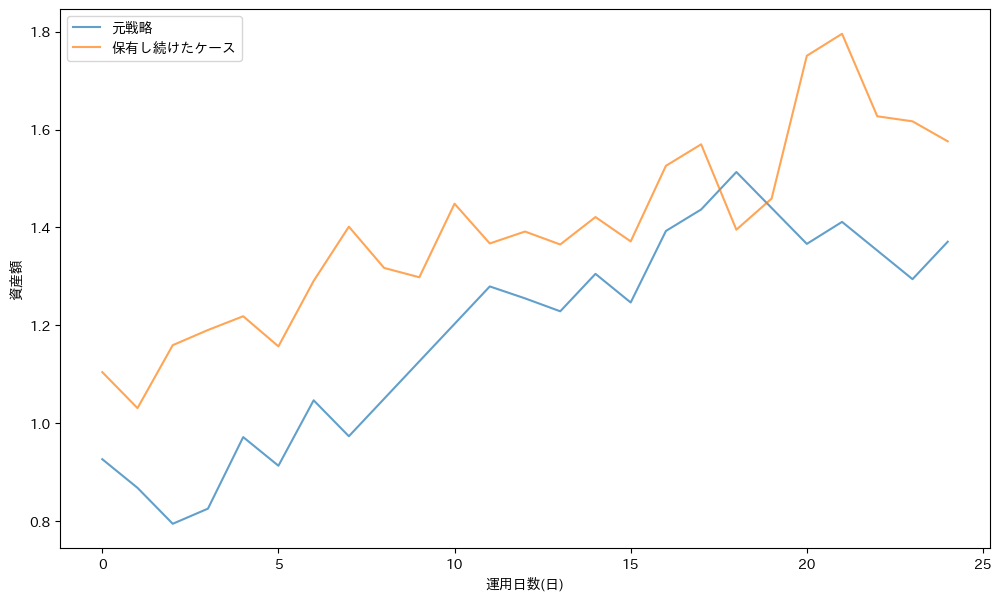

In [46]:

data['predict']= [1 for i in range(len(df)+1)]
c, df3 = calc(data, 1, 1, False,1,1, data2)
def graph3(df, save, file_name, raw_data=df3, simple_interest=False):
    if not simple_interest:
        
        print("利回り中心です。各y値は、総資産/初期資金です。")
        temp, temp2 = df["interest"].values, raw_data["interest"].values

        initial = df["open_price"][0] 
        lis = np.cumsum(temp) + initial
        lis2 = np.cumsum(temp2) + initial
        
        
        profit_month =np.array(lis)  / initial
        profit_month2 =np.array(lis2)  / initial

        # 月ごとのそれまでの最大資産の計算
        max_assets = pd.Series(profit_month).cummax().values
        
        total = profit_month
        total2 = profit_month2

        
        # ドローダウンの計算
        dd = 1 - profit_month / max_assets
    else:
        print("単利計算です。各y値は、その時点までの各利率の累積です。")
        temp, temp2 = df["Return"].values, raw_data["Return"].values

        

        profit_daily = temp
        profit_daily2 = temp2


        # 単利運用での資産額の計算(初日を1とする)
        total = 1 + np.cumsum(profit_daily) 
        total2 = 1 + np.cumsum(profit_daily2)

        
        # 日ごとのそれまでの最大資産の計算
        max_assets = pd.Series(total).cummax().values 

        # ドローダウンの計算
        dd = max_assets - total # 単利運用なので初期資金(1)に対する額で計算
    
    # 最大ドローダウンの計算
    max_dd_percent = max(dd) * 100
    print(f'最大ドローダウン: {max_dd_percent:.3f} %')
    fig, ax1 = plt.subplots(figsize=(12, 7))

    ax1.set_xlabel('運用日数(日)')
    ax1.set_ylabel('資産額')
    
    ax1.plot(total, label='元戦略', alpha=0.7)
    ax1.plot(total2, label='保有し続けたケース', alpha=0.7)

    ax1.legend()
    
    if save:
        fig.savefig(file_name+".png")

graph3(df, False, './graph_image/USReit_3moTest', df3, True)

In [25]:
data['predict']= [1 for i in range(len(data))]
c, df3 = calc(data, 1, 1, False,1,1,1, data2)
array = df.index
df2 = yf.download('^DJI', start='2011-08-01', interval='1d')
dfX = pd.DataFrame()
for i, j in enumerate(array):
    try:
        array[i+1]
    except:
        horizon = df2.loc[j:, :]
    else:
        horizon = df2.loc[j:array[i+1], :]
    try:
        op, cl, high, low = horizon.head(1)['Open'].values, horizon.tail(1)['Close'].values, max(horizon['High']), min(horizon['Low'])
    except:
        continue
    temp = pd.DataFrame({'Open':op, 'Close':cl, 'High':high, 'Low':low}, index=[j])
    dfX = pd.concat([dfX, temp])

data2['Trade']['2021-01-01':].head(10)

dfX['predict'] = [1 for i in range(len(dfX))]
df2['Trade'] = data2['Trade']
_, dataX = calc(
            data=dfX,
            losscut_rate=1, 
            profitlevel=1, 
            reverse=False,
            leverage=1, # 第４因数は、Falseの方がデフォです。
            losscut2=1, 
            profitlevel2=1, 
            data2=df2)  

C:\Users\admin\AppData\Local\Temp\ipykernel_9988\1884156507.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['predict']= [1 for i in range(len(data))]
C:\Users\admin\AppData\Local\Temp\ipykernel_9988\4112177944.py:161: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  initiate_asset = data["Open"][0]


(入力前の)シグナルが0なら売ります。
index 0 is out of bounds for axis 0 with size 0
loss_cut: 0 profit_count: 0
totalreturn: [29.49001694] initiate_asset:57.7400016784668
[*********************100%%**********************]  1 of 1 completed
(入力前の)シグナルが0なら売ります。


C:\Users\admin\AppData\Local\Temp\ipykernel_9988\4112177944.py:161: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  initiate_asset = data["Open"][0]


loss_cut: 0 profit_count: 0
totalreturn: [23123.46289062] initiate_asset:12221.1904296875


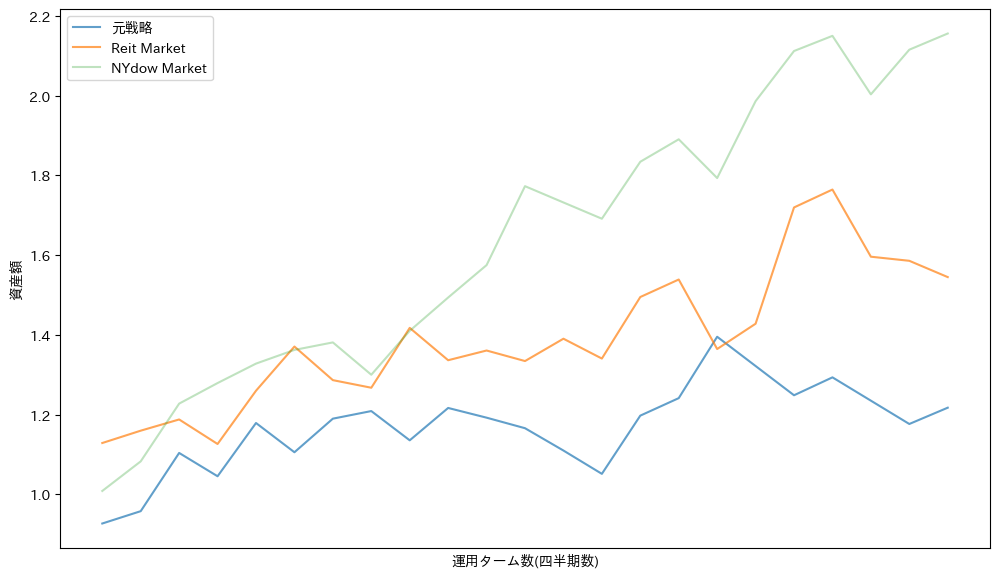

In [26]:
def graph(df, save, file_name, raw_data, NYdow):
    
    NYdow = NYdow.loc['2011-08-01':]
    
    profit = df["Return"].values
    profit2 = raw_data["Return"].values
    profit3 = (NYdow["Return"]).values 
    
    # 単利運用での資産額の計算(初日を1とする)
    total = 1 + np.cumsum(profit) 
    total2 = 1 + np.cumsum(profit2)
    total3 = 1+np.cumsum(profit3) 
    
    # 日ごとのそれまでの最大資産の計算
    max_assets = pd.Series(total).cummax().values 


    indexes = pd.to_datetime(df.index, format="%Y-%m-%d")
    #indexes = [dt.strftime(array[i], format="%Y-%m-%d") if i % 4 == 2 else '' for i in range(len(array))]
    
    fig, ax1 = plt.subplots(figsize=(12, 7))
    ax1.set_xticks(df.index[::10])
    ax1.set_xticklabels(indexes[::10],rotation=45)
    ax1.set_xlabel('運用ターム数(四半期数)')
    ax1.set_ylabel('資産額')
    
    ax1.plot(total, label='元戦略', alpha=0.7)
    ax1.plot(total2, label='Reit Market', alpha=0.7)
    ax1.plot(total3, label='NYdow Market', alpha=0.3)
    
    ax1.legend(loc='upper left')
    
    if save:
        fig.savefig(file_name+".png")
graph(df=df,
      save=False,
      file_name='graph',
      raw_data=df3,
     NYdow=dataX)

In [23]:
df

,signal,Return,totalreturn,profitline,loss_cut,interest,open_price
2012-01-01,0.0,-0.073400,-4.195544,not crossed,Losscut.,-4.195544,57.160000
2012-07-01,1.0,0.030965,-2.195544,not crossed,safe,2.000000,64.589996
2013-01-01,1.0,0.146100,7.518645,crossed,safe,9.714189,66.489998
2013-07-01,1.0,-0.058500,3.526605,not crossed,Losscut.,-3.992040,68.239998
2014-01-01,1.0,0.133646,12.086602,not crossed,safe,8.559998,64.050003
...,...,...,...,...,...,...,...
2021-01-01,0.0,-0.073400,21.426032,not crossed,Losscut.,-6.032746,82.190002
2021-07-01,1.0,0.044935,26.186034,not crossed,safe,4.760002,105.930000
2022-01-01,1.0,-0.058500,19.687854,not crossed,Losscut.,-6.498180,111.080002
2022-07-01,1.0,-0.058500,14.338030,not crossed,Losscut.,-5.349825,91.449997
